In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

3


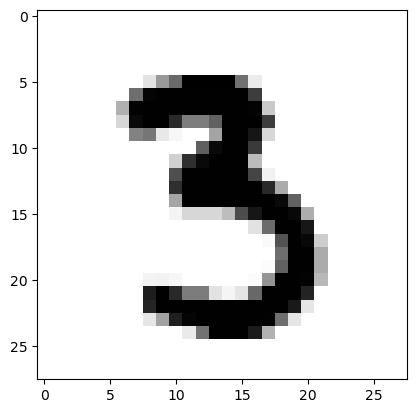

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[298], cmap='Greys')
print(y_train[298])

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [7]:
model = Sequential(
    [
        Dense(512, input_dim=784, activation='relu'),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

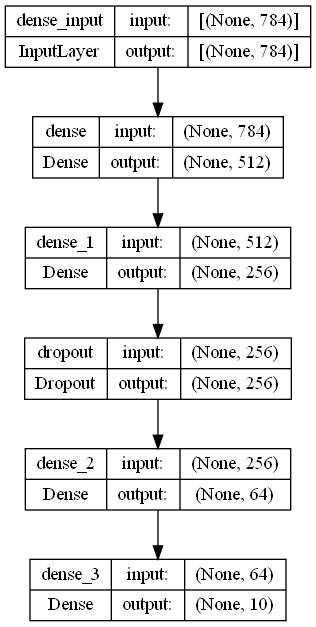

In [9]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['categorical_accuracy'])

In [11]:
model.fit(x_train, y_train,  batch_size=128, epochs=10, verbose=0)

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('loss: %.2f, accuracy: %.2f' % ((loss*100), (accuracy*100)))

loss: 9.44, accuracy: 98.22


In [19]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)[:]
label = np.argmax(y_test, axis=1)[:]


correct = 0
for i in range(20):
    print('predicted %d ===> expected %d' % (pred[i], label[i])) 

    if pred[i] == label[i]:
        correct += 1
print(f'number of instance: {i} ===> predicted correct : {correct}')
        

313/313 [==============================] - 0s 1ms/step
predicted 7 ===> expected 7
predicted 2 ===> expected 2
predicted 1 ===> expected 1
predicted 0 ===> expected 0
predicted 4 ===> expected 4
predicted 1 ===> expected 1
predicted 4 ===> expected 4
predicted 9 ===> expected 9
predicted 5 ===> expected 5
predicted 9 ===> expected 9
predicted 0 ===> expected 0
predicted 6 ===> expected 6
predicted 9 ===> expected 9
predicted 0 ===> expected 0
predicted 1 ===> expected 1
predicted 5 ===> expected 5
predicted 9 ===> expected 9
predicted 7 ===> expected 7
predicted 3 ===> expected 3
predicted 4 ===> expected 4
number of instance: 19 ===> predicted correct : 20
